
## Что такое среднее и как с ним правильно работать.

In [1]:
import numpy as np
import pandas as pd
from random import choices, shuffle
import scipy.stats as sps
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### 1. Кошачий университет

Пусть у нас есть 20 групп котиков-студентов.

**Вопрос:** сколько котиков в среднем в группе?

**Ответ деканата:** посчитать количество котиков в каждой группе и взять среднее арифметическое полученных чисел.

Проведем эксперимент. Сгенерируем 20 групп, причем в каждой будет от 10 до 30 котиков. 

In [2]:
groups_count = 20

groups_size = sps.randint(low=10, high=30).rvs(size=groups_count)
groups_size

array([11, 26, 18, 17, 11, 13, 12, 27, 13, 26, 19, 19, 17, 26, 26, 10, 16,
       29, 17, 19])

Ответ получить очень просто:

In [3]:
groups_size.mean()

18.6

Теперь предположим, что мы хотим провести эксперимент согласно тому, как учат в анализе данных:
* возьмем случайную выборку котиков, 
* спросим у них, сколько котиков в их группе,
* усредним полученные ответы.

*Замечание.* Следующие операции с точки зрения кода можно сделать более эффективно, однако приведенный код повышает эффектность изложения материала.

Для начала давайте создадим список всех студентов-котиков, каждому из которых присвоим номер группы.

In [4]:
students_group = []

for i in range(groups_count):
    students_group += [i] * groups_size[i]

Возьмем 30 случайных котиков, спросим их и усредним ответы

In [5]:
random_indexes = np.array(choices(students_group, k=30))
groups_size[random_indexes].mean()

20.7

Хм, среднее получилось больше, чем ответ деканата. Может случайно так получилось? Ведь эксперимент случайный.

Давайте повторим эксперимент 10 раз.

In [6]:
for _ in range(10):
    random_indexes = np.array(choices(students_group, k=30))
    print(np.round(groups_size[random_indexes].mean(), 2))

21.67
21.0
20.67
19.37
21.33
19.3
20.6
22.43
21.43
21.3


Что-то все равно не так...

А что будет если опросить вообще всех котиков? Навернято хоть тут должен получиться тот же ответ.

Попробуем

In [7]:
groups_size[np.array(students_group)].mean()

20.50537634408602

Хм, ответ все равно получился не тот, что сказали нам в деканате... В чем же дело?

Оказывается, дело в том, что выбирая случайного котика мы чаще попадаем на котика из большей группы. В самом деле, если
* $n$ &mdash; общее количество котиков, 
* $n_j$ &mdash; количество котиков в группе $j$,

то вероятность того, что случайно выбранный котик учится в группе $j$ равна $n_j/n$.

Посчитаем теперь средний ответ котика. Пусть $\xi$ &mdash; количество студентов в группе у случайно выбранного котика. Тогда 
$$\mathsf{E} \xi = \frac1n \sum_{котик\ i} \sum_{j} n_j \cdot I\{котик\ i\ из\ группы\ j\} = \frac1n \sum_{j} n_j^2.$$

Проверим ответ:

In [8]:
(groups_size**2).sum() / groups_size.sum()

20.50537634408602

Это среднее можно посчитать другим способом:
$$\mathsf{E} \xi = \sum_j n_j \cdot \mathsf{P}(случайный\ котик\ из\ группы\ j).$$

Если рассматривать в качестве данных сами группы, а не котиков, то такой тип усреднения называется **взвешенным средним**. Общая формула взвешенного среднего чисел $x_1, ..., x_n$ с неотрицательными весами $w_1, ..., w_n$, для которых выполнено $\sum_{i=1}^n w_i=1$, имеет вид $$\sum_{i=1}^n w_i x_i.$$

**Выводы:**
* Деканат в качестве объектов данных рассматривает группы и берет по ним арифметическое среднее.
* При проведении опроса объектами данных выступают котики, и арифметическое среднее по котикам отличается от результата деканата.
* Деканат может взять взвешенное среднее и получить тот же ответ, что при проведении опроса.

Этот пример &mdash; частный случай **парадокса инспекции**, который можно охарактеризовать как непосредственную зависимость наблюдения количества с самим наблюдаемым количеством.

---
### 2. Средняя зарплата

**Вопрос:** какова средняя зарплата населения?

Важно отличать разные "виды средних":
* обычное **среднее арифметическое**,
* **медиана** &mdash; значение, слева и справа от которого одинаковое количество элементов,
* **мода** &mdash; самое частое значение.

Разницу между ними наглядно показывает иллюстрация из книги *Huff D. How To Lie With Statistics. — New York: W.W. Norton & Company, 1954*.

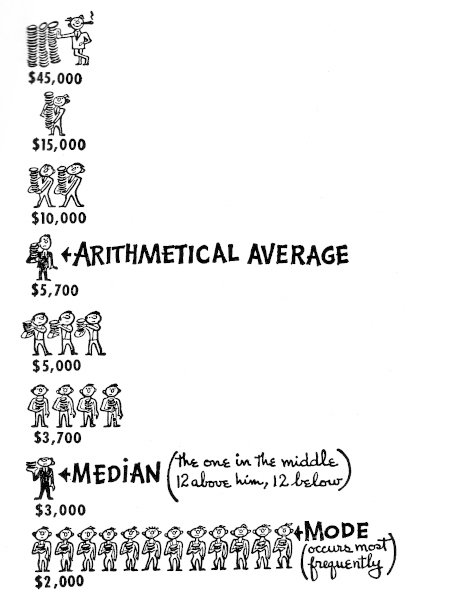

Посмотрим на численном примере. Сгенерируем зарплату 10 000 человек в соответствии с некоторым распределением.

In [9]:
count = 10000
salary = np.abs(sps.t(df=2, scale=100).rvs(size=count))

Посмотрим на *описательные статистики*. Как мы видим, среднее достаточно сильно отличается от медианы.

In [10]:
pd.Series(salary).describe()

count    10000.000000
mean       143.361444
std        274.727742
min          0.014972
25%         35.979807
50%         81.488075
75%        162.664021
max       8320.602082
dtype: float64

Посмотрим на гистограмму распределения. Однако, в данном случае в выборке есть **выбросы** &mdash; сильно выделяющиеся по сравнению с остальными наблюдения. Видимо, выбросами у нас являются миллиардеры. В анализе данных существуют специальные методы для работы с выбросами, однако не редко их просто выбрасывают из анализа.

Выбросы сильно влияют на вид гистограммы. В данном случае видна широкая часть графика справа, в которой скорее какая-то пустота. Для наглядности стоит рисовать гистограмму в логарифмическом масштабе, на которой явно видно имеющиеся выбросы.

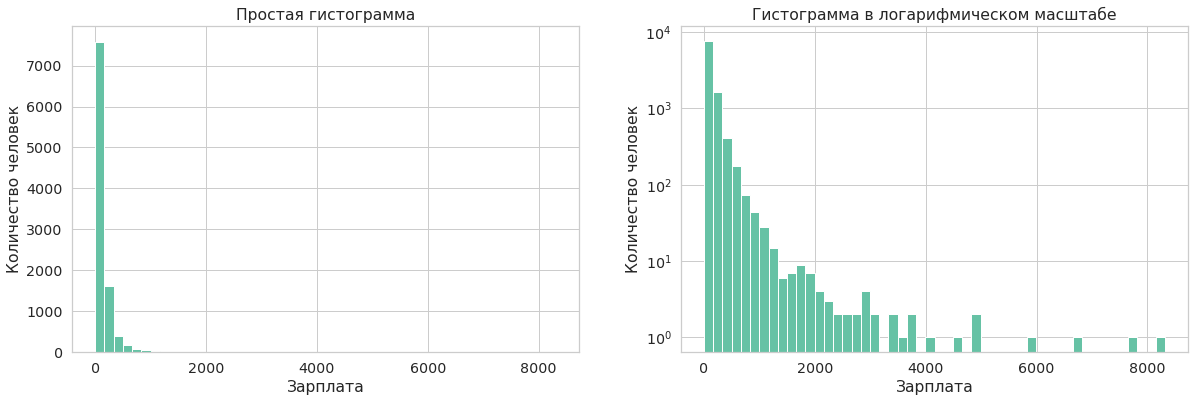

In [11]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(salary, bins=50)
plt.xlabel('Зарплата')
plt.ylabel('Количество человек')
plt.title('Простая гистограмма')

plt.subplot(122)
plt.hist(salary, bins=50, log=True)
plt.xlabel('Зарплата')
plt.ylabel('Количество человек')
plt.title('Гистограмма в логарифмическом масштабе')

plt.show()

Попробуем убрать несколько выбросов и посчитать среднее по оставшимся элементам. Как видим, среднее достаточно сильно уменьшилось, хотя мы выкинули около 10 человек.

In [12]:
salary[salary < 3300].mean()

137.01957408968383

Такой вид усреднения обычно называется **усеченное среднее**. Чаще усеченное среднее рассматривают для симметричных распределений, исключая одинаковое количество минимальных и максимальных значений.